## Exercise 1.2
Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

Use high_pass, low_pass, and band_stop to filter out some of the harmonics. Then convert the spectrum back to a wave and listen to it. How does the sound relate to the changes you made in the spectrum?

In [113]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve
    urlretrieve("https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py", "thinkdsp.py")

In [114]:
from thinkdsp import read_wave

wave = read_wave('Sounds/105384__drzoom__hitting-pan-top-large.wav')
wave.normalize()
wave.make_audio()

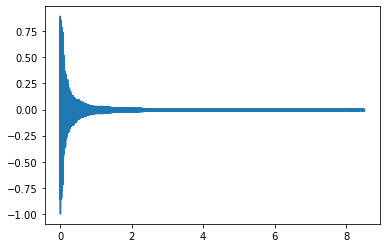

In [115]:
wave.plot()

In [116]:
segment = wave.segment(start=0, duration=0.3)
segment.make_audio()

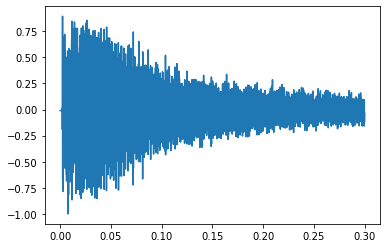

In [117]:
segment.plot()

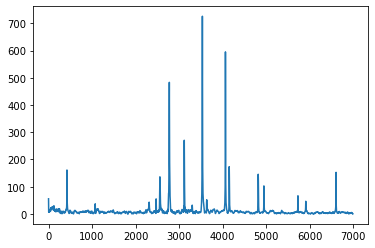

In [118]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

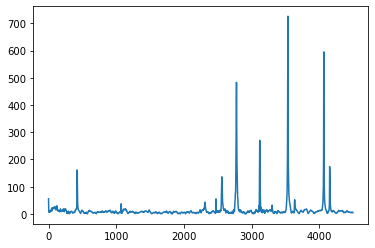

In [119]:
spectrum = segment.make_spectrum()
spectrum.plot(high=4500)

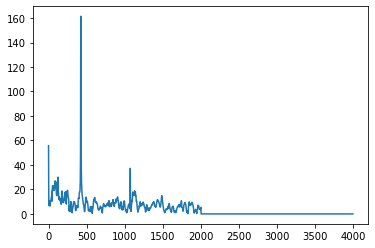

In [120]:
spectrum.low_pass(2000)
spectrum.plot(high=4000)

In [121]:
spectrum.make_wave().make_audio()

## Exercise 1.3
Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

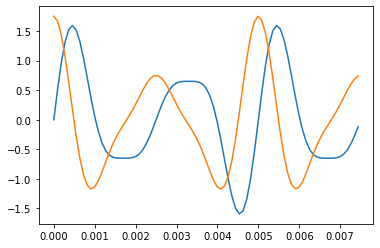

In [122]:
from thinkdsp import SinSignal, CosSignal

sin_signal = (SinSignal(freq=400, amp=1.0) +
          SinSignal(freq=600, amp=0.5) +
          SinSignal(freq=800, amp=0.25))

cos_signal = (CosSignal(freq=400, amp=1.0) +
          CosSignal(freq=600, amp=0.5) +
          CosSignal(freq=800, amp=0.25))

sin_signal.plot()
cos_signal.plot()

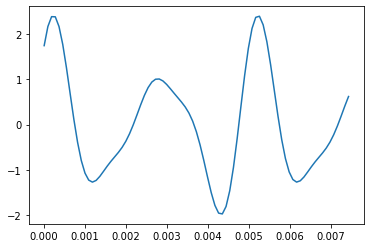

In [123]:
signal = sin_signal + cos_signal
signal.plot()

In [124]:
wave2 = signal.make_wave(duration=0.5)
wave2.make_audio()

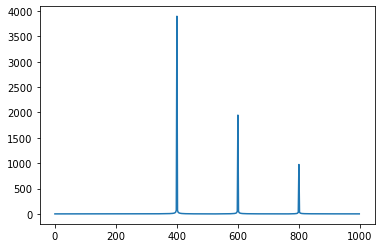

In [125]:
spectrum2 = wave2.make_spectrum()
spectrum2.plot(high=1000)

In [126]:
signal += SinSignal(freq=133, amp=0.75)
wave3 = signal.make_wave()
wave3.make_audio()

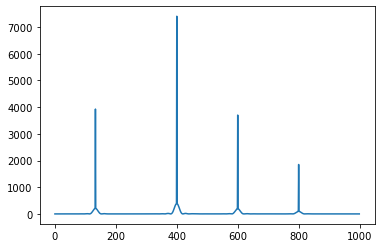

In [127]:
wave3.apodize()
spectrum3 = wave3.make_spectrum()
spectrum3.plot(high=1000)

## Exercise 1.3
Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.  Hint: it should only take two lines of code.

In [128]:
def stretch(wav, factor):
    wav.ts *= factor
    wav.framerate /= factor

In [129]:
wave4 = read_wave('Sounds/105384__drzoom__hitting-pan-top-large.wav')
wave4.normalize()
wave4.make_audio()

In [130]:
stretch(wave4, 0.5)
wave4.make_audio()

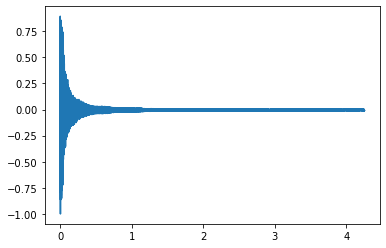

In [131]:
wave4.plot()
